In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv(r".\data\diabetes_data_upload.csv")
dataframe.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
%%time
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
gender_encoder = label_encoder.fit(['Male', 'Female'])
other_encoder = label_encoder.fit(['Yes', 'No'])
class_encoder = label_encoder.fit(['Positive', 'Negative'])

dataframe['Gender'] = gender_encoder.fit_transform(dataframe['Gender'])
columns = list(dataframe.columns)
columns = columns[2:len(columns)-1]
for col in columns:
    dataframe[col] = other_encoder.fit_transform(dataframe[col])
dataframe['class'] = class_encoder.fit_transform(dataframe['class'])
dataframe.head()

Wall time: 3.47 s


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [4]:
X = dataframe.drop(columns='class')
y = dataframe['class']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, criterion='entropy', n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=-1)

In [7]:
model.feature_importances_

array([0.10242513, 0.11329501, 0.17367005, 0.22190351, 0.05507599,
       0.03031716, 0.03739369, 0.02810958, 0.02046964, 0.04379193,
       0.03742157, 0.0324645 , 0.02621014, 0.0311162 , 0.02984031,
       0.01649558])

Text(0.5, 1.0, 'Random Forest Feature Importance')

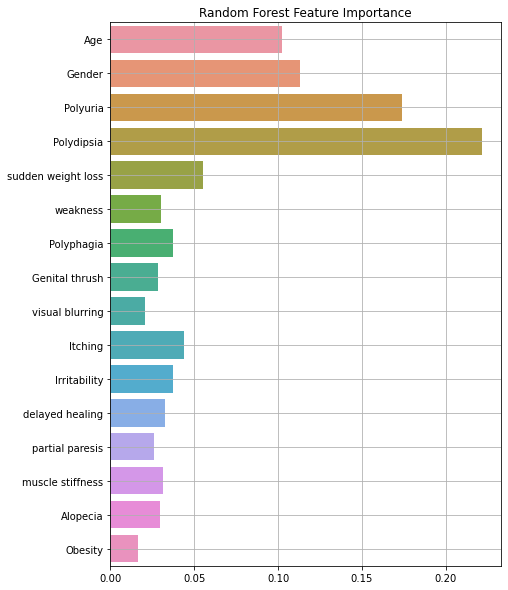

In [8]:
fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(111)
sns.barplot(x=model.feature_importances_, y=X_train.columns)
ax.grid(True)
ax.set_title("Random Forest Feature Importance")

In [9]:
prediction = model.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(f"Accuracy score: {accuracy_score(y_test, prediction) * 100}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, prediction)}")
print(f"\nClassification report: \n{classification_report(y_test, prediction)}")

Accuracy score: 100.0
Confusion Matrix: 
[[95  0]
 [ 0 77]]

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        77

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172

